<a href="https://colab.research.google.com/github/simoncellia/Proyecto_Tec_12/blob/main/Circular_Pocket_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### El siguiente ejemplo permite crear codigo ISO-G para pocket circulares en las posiciónes deseadas, fue **creada sólo con fines didacticos y emplearse en un entorno simulado**, en ningun caso reemplaza una solución comercial. En caso de usarse para este o cualquier otro fin el usuario asume toda responsabilidad asociada a cualquier daño o perjucio que pueda generar.

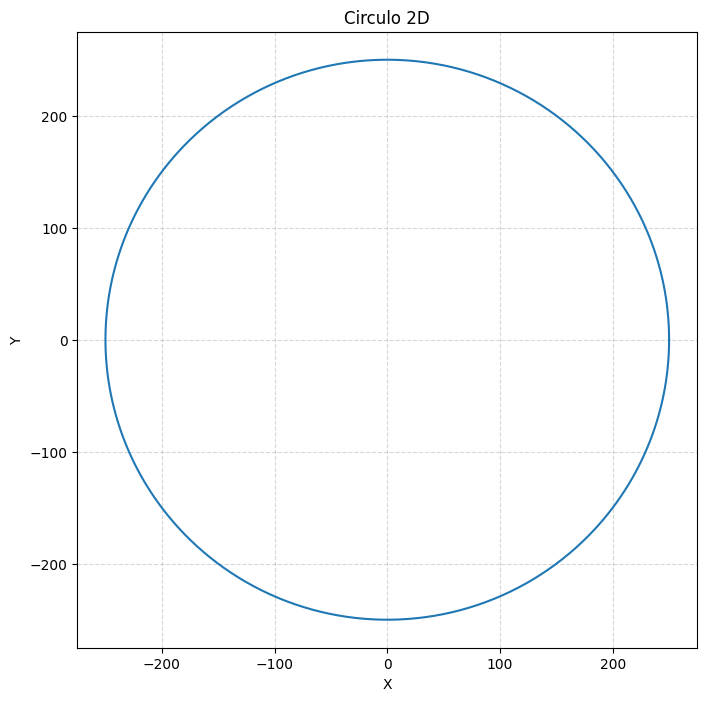

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r_inicial= 250

theta=np.linspace(0,2*np.pi,1000)

x=r_inicial*np.cos(theta)
y=r_inicial*np.sin(theta)

fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño de la figura

# Graficar Circulo
ax.plot(x, y)

ax.set_title('Circulo 2D')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Agregar una cuadrícula suave
ax.grid(True, linestyle='--', alpha=0.5)

Crearemos una función para poder utilizarla de forma iterativa llamaremos ppv a los puntos por vuelta

In [5]:
def circulo(r_inicial, ppv=200):
    theta=np.linspace(0,2*np.pi,ppv)
    x=r_inicial*np.cos(theta)
    y=r_inicial*np.sin(theta)
    return  x,y

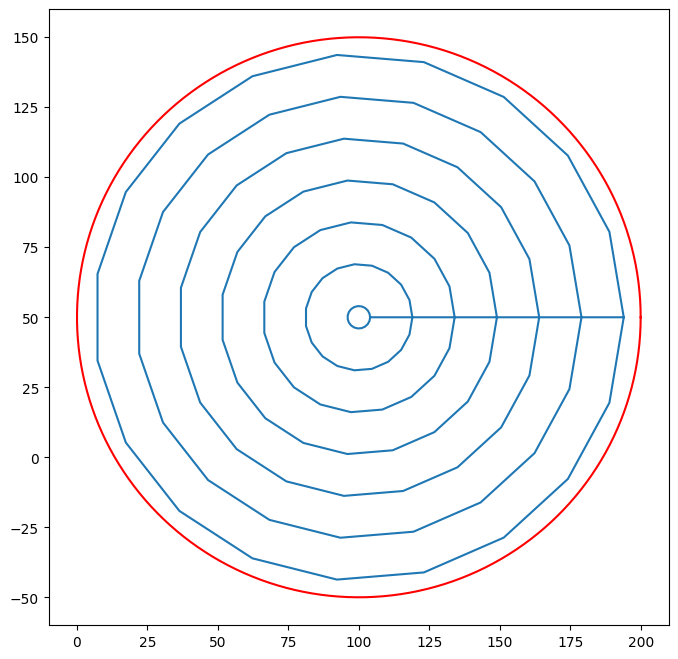

In [44]:
d_hta= 12 # diametro de la herramienta
r_hrt=d_hta/2 # radio de la herramienta

Robjetivo=100 # radio del pocket
ric=Robjetivo-r_hrt # radio incial a cortar
sobrepaso=15 # paso entre cada corte.
x0 = 100
y0 = 50

radios=np.arange(ric,0,-sobrepaso)






x_gcode=np.array([])
y_gcode=np.array([])

for radio in radios:
  x,y=circulo(radio,ppv=20)

  x_gcode=np.append(x_gcode,x)
  y_gcode=np.append(y_gcode,y)

#moverlo a punto de centro deseado:
x_gcode=x_gcode+x0
y_gcode=y_gcode+y0


# Graficar Circulo
fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño de la figura

poc_x,poc_y=circulo(Robjetivo)

poc_x=poc_x+x0
poc_y=poc_y+y0

ax.plot(poc_x,poc_y, color="red")
ax.plot(x_gcode, y_gcode)



Crearemos nuestro código g replicando esta forma para varias altura de Z.

In [45]:
# Crear el archivo G-Code a partir de los puntos del espiral
filename = "pocket_circular.gcode"

z0=0 #nivel inicial
zf=-10 # nivel final
paso=3 # paso vertical en mm:
z_seguro=10

Altura_absoluta=np.abs(zf-z0)
n_pasadas=round(Altura_absoluta/paso)+1
h_pasada=Altura_absoluta/(n_pasadas)


z=np.linspace(z0-h_pasada,zf,n_pasadas)
x=x_gcode         #nuesteos valores de x para el pocket creado
y=y_gcode         #nuesteos valores de y para el pocket creado

vel_plung=100 #velocidad de plunge
vel_circ=1000 #velocidad de mecanizado

with open(filename, "w") as file:
    file.write("G21 ; Configurar unidades a milímetros\n")
    file.write("G90 ; Usar posicionamiento absoluto\n\n")

    for zi in z:
      #print(zi)
      file.write(f"G0 Z{z_seguro}\n")
      file.write(f"G0 X{x[0]} Y{y[0]} Z{z_seguro}\n")

      file.write(f"G1 Z{zi} F{vel_plung} \n") # carga vertical
      file.write(f"G1 X{x[0]} Y{y[0]} Z{zi} F{vel_circ}\n") #inicio del circulo con velocidad

      for xi, yi in zip(x[1:], y[1:]):
        file.write(f"G1 X{xi:.4f} Y{yi:.4f} Z{zi:.4f}\n")

      file.write(f"G0 Z{z_seguro}\n")
      file.write(f"G0 X{x[0]} Y{y[0]} Z{z_seguro}\n")

print(f"Archivo G-Code generado: {filename}")

Archivo G-Code generado: pocket_circular.gcode
